## Task 1

1/2 is the probability of winning each match, all events independent. (1/2)^(n-1) is the probability that some team becomes clear winner. If one team became a clear winner other teams can't be clear winners at the same time, so we shouldn't consider these possibilities. We have n teams and any of them has equal chance to become a clear winner. The probabilty of having a clear winner will be n(1/2)^(n-1), so the probabilty of not having a clear winner will be 1-n(1/2)^(n-1).

$$p=1-n\left(\frac{1}{2}\right)^{n-1}=1-10\left(\frac{1}{2}\right)^{9}=0.9805$$

## Task 2
### (a)

This probabilty can found using hypergeometric distribution. We have N=50 candies in total, D=35 of them have the desired property (are black). The probability to draw k=20 black candies out of 35 can be calculated as

$$p=\frac{\binom{D}{k}\binom{N-D}{n-k}}{\binom{N}{n}}=\frac{\binom{35}{20}\binom{50-35}{25-20}}{\binom{50}{25}}=\frac{\binom{35}{20}\binom{15}{5}}{\binom{50}{25}}=\frac{\frac{35!}{(35-20)!20!}\frac{15!}{(15-5)!5!}}{\frac{50!}{(50-25)!25!}}=\frac{\frac{35!}{15!20!}\frac{15!}{10!5!}}{\frac{50!}{25!25!}}=\frac{35!15!25!25!}{15!20!10!5!50!}=0.0772$$

### (b)

To find this probabilty we can use multivariate hypergeometric distribution.

We have two events, first one when we draw candies for the first time and write down numbers and second one when we draw for the second times. These two events are independent because we draw with replacement. So we need to calculate the probabilty of the first event and bring it to a square.

$$p=\left(\frac{\binom{35}{n_0}\binom{8}{n_1}\binom{5}{n_2}\binom{2}{n_3}}{\binom{50}{25}} \right)^2$$

n0+n1+n2+n3=25. The answer will of course depend on n0...n3 because a rare combination will be harder to repeat than a common one.

## Task 3

### (a)

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Let's implement the fuction from the task in Python:

In [115]:
def Fun(x1,x2,x3,x4):
    while True:
        if x3>0:
            x3-=1
            x4+=1
        elif x2>0:
            x2-=1
            x3+=x4
        elif x1>0:
            x1-=1
            x2+=x4
            x4=1
        else:
            return x4

When x1>0 the algorithm increases x2 by x4 first and only then makes x4=1. It must be some mistake and becomes a source of instability. We can get results only when x1, x2, x3 all become 0. But on its way to zero x2 increases x3 by x4, and x3 increases x4. As the result x4 can grow monotonically as long as all x1, x2 and x3 aren't exhausted.

We get numeric results for n1 from 0 to 4 only, after that computation begins to take too long:

In [118]:
for i in range(5):
    print 'for n1=%d Fun(n1,0,0,1)=%d' % (i,Fun(i,0,0,1))

for n1=0 Fun(n1,0,0,1)=1
for n1=1 Fun(n1,0,0,1)=2
for n1=2 Fun(n1,0,0,1)=4
for n1=3 Fun(n1,0,0,1)=16
for n1=4 Fun(n1,0,0,1)=65536


Even with n1=4 we need more than 65536 steps of the algorithm to get the result cause x4 only grows by 1.

Let's make changes to the algorithm: it will store x values for each loop and will stop when the loop counter reaches some number.

In [119]:
def Fun(x1,x2,x3,x4,stop):
    x = []
    counter = 0
    while True:
        x.append([x1,x2,x3,x4])
        counter += 1
        if counter==stop:
            return np.array(x)
        elif x3>0:
            x3-=1
            x4+=1
        elif x2>0:
            x2-=1
            x3+=x4
        elif x1>0:
            x1-=1
            x2+=x4
            x4=1
        else:
            return x4

Now we'll plot x values for different n1 to understand their behaviour.

In [110]:
import matplotlib.pyplot as plt
import numpy as np

def plot_x(n1,stop):
    x = Fun(n1,0,0,1,stop)
    t = range(len(x))
    x1 = [el[0] for el in x]
    x2 = [el[1] for el in x]
    x3 = [el[2] for el in x]
    x4 = [el[3] for el in x]
    
    sns.set_context("paper", font_scale=1.5)
    sns.set_style("white")
    plt.rc('text', usetex=False)
    fig, ax = plt.subplots(4, sharex=True, figsize=(12,12))
    
    for i, el in enumerate([x1,x2,x3,x4]):
        if i==0:
            ax[i].set_title('x in Fun(n1,0,0,1) for n1=%d' % (n1))
        ax[i].plot(t, el)
        ax[i].set_ylabel('x'+str(i+1))
        ax[i].xaxis.grid()
        ax[i].yaxis.grid()
    
    plt.xlabel('loop period, t')
    plt.show()

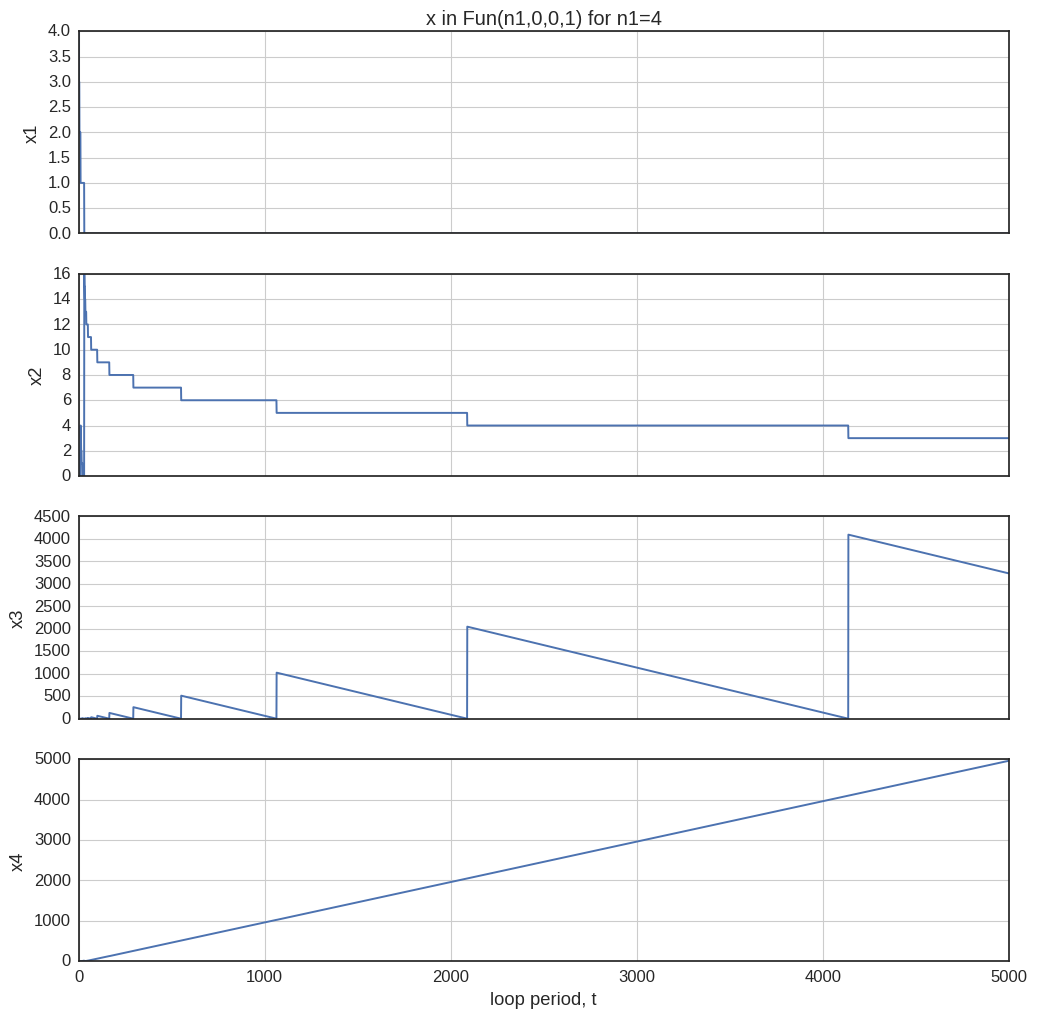

In [111]:
plot_x(4,5000)

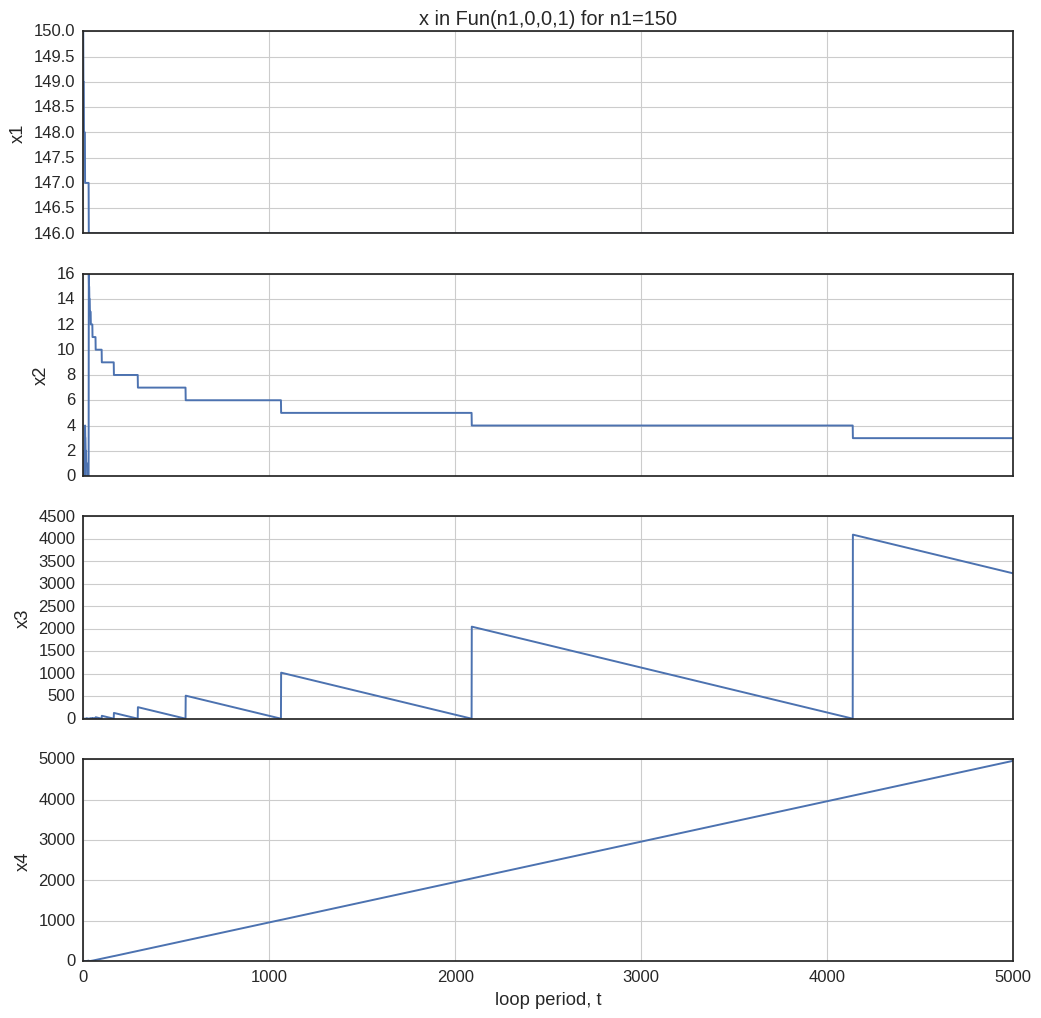

In [113]:
plot_x(150,5000)

As we can see from the plots above all the variables x demonstrate similar behaviour: x3 falls from its value to 0 and as a result it adds its value to x4. But after that x2 that is higher than 0 adds increased x4 back to x3 and the process repeats. After each going back to zero x3 multiplies itself by 2 with addition of initial x4 value. x2 always reach 16 before this explosion-like process begins.

### (b)

The algorithm must bring all x1, x2 and x3 to zero to return a value (x4). x3 can go down to zero after x2 is exhausted (goes down to 0). x2 can go to zero when x1 is exhausted and becomes zero. But because of growing x4 with the growth of n1 the computational time will approach infinity. But this function will always return a value when all x1, x2 and x3 are exhausted.

## Task 4
### (a), (b)

Let's load the data and see top rows.

In [1]:
import pandas as pd
data = pd.read_csv('eta_conversion_task_4.csv', index_col=0)

In [2]:
data.head()

,norm_eta,conversion
0,1.275654,1
1,0.977867,1
2,0.201207,1
3,2.084507,0
4,2.152918,0


In [10]:
data.groupby(by=data.conversion).count()

,norm_eta
conversion,
0,268
1,206


We have 268 cases for zero conversion and 206 cases for conversion=1.

Let's draw norm_eta distribution histograms for coversion=0 and conversion=1 cases.

In [3]:
import seaborn as sns

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


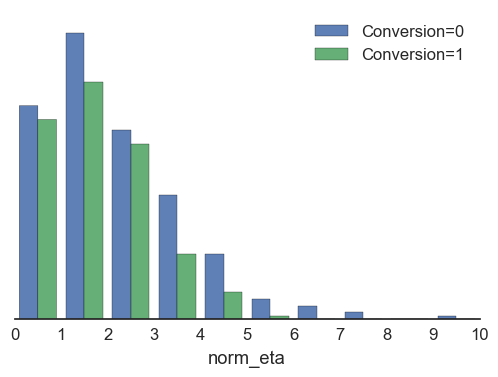

In [82]:
sns.set_context("paper", font_scale=1.5)
sns.set_style("white")
plt.rc('text', usetex=False)
fig, ax = plt.subplots(figsize=(6,4))
sns.despine(left=True)

eta0=data[data.conversion == 0].norm_eta
eta1=data[data.conversion == 1].norm_eta

labels=['Conversion=0','Conversion=1']

ax.hist([eta0, eta1], bins=10, histtype='bar', align='mid', label=labels, alpha=0.9)

ax.set_xlabel('norm_eta')
plt.xticks(range(11))
ax.get_yaxis().set_visible(False)
ax.legend()
plt.show()

Both distribution have the same modal interval, from 1 to 2.

Let's calculate norm_eta means for both series and compare them.

In [42]:
data.groupby(by=data.conversion).mean()

,norm_eta
conversion,
0,2.17026
1,1.77330


For both groups of cases average norm_eta is close to 2. Let's check whether we have a statistically significant difference in means or not.

It's clear from the distribution plots above that data aren't normally distributed, so we need to use non-parametric test for independent samples in order to compare means. We will use Mann-Whitney U test with an alternative hypotesis that we have greater norm_eta for zero conversion cases.

In [86]:
from scipy import stats
stats.mannwhitneyu(eta0, eta1, alternative='greater')

MannwhitneyuResult(statistic=31155.5, pvalue=0.0081501234144581609)

Mann-Whitney U test p-value is less than 0.01 so we clearly reject the null hypotesis of equal means in favor of an alternative that have greater norm_eta for zero conversion even at 1% significance level. Although this difference is statistically significant in practice it's not high, just 0.4. 

We will now compute 0 conversion cases share for each histogram bin.

In [43]:
import numpy as np

In [62]:
r_min, r_max = data.norm_eta.min(), data.norm_eta.max()
hist0 = np.histogram(eta0, bins=10, range=[r_min, r_max])
hist1 = np.histogram(eta1, bins=10, range=[r_min, r_max])

In [63]:
hist0

(array([62, 83, 55, 36, 19,  6,  4,  2,  0,  1]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.]))

In [64]:
hist1

(array([58, 69, 51, 19,  8,  1,  0,  0,  0,  0]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.]))

In [65]:
shares0 = []
for x0, x1 in zip(hist0[0], hist1[0]):
    shares0.append(x0*1./(x0+x1))
shares0 = np.array(shares0)

In [66]:
shares0

array([ 0.51666667,  0.54605263,  0.51886792,  0.65454545,  0.7037037 ,
        0.85714286,  1.        ,  1.        ,         nan,  1.        ])

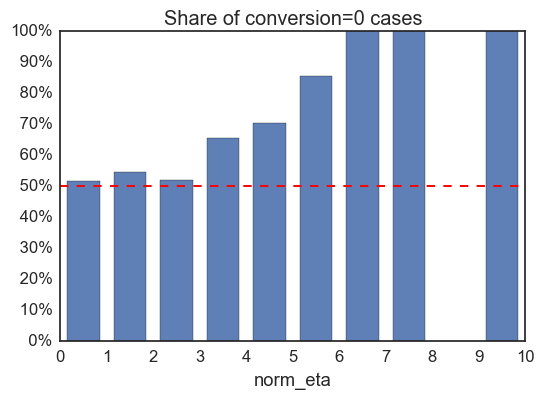

In [92]:
sns.set_context("paper", font_scale=1.5)
sns.set_style("white")
plt.rc('text', usetex=False)
fig, ax = plt.subplots(figsize=(6,4))

hist, bins = shares0, hist0[1]
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width, alpha=0.9)
ax.set_xlabel('norm_eta')
plt.xticks(range(11))
plt.yticks([0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1.])
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.0f}%'.format(x*100) for x in vals])
plt.title('Share of conversion=0 cases')
plt.plot([0, 10], [.5, .5], 'k--', color='red')
plt.show()

We can see from the graph that conversion=0 cases share becomes substantially higher than 0.5 after norm_eta reaches 3 and grows steadily. When norm_eta is higher than 6 conversion will be zero in all cases (100%). 

## Task 5

## (a)

To evaluate affiliates performance we need to calculate financial results for users invited by them comparing revenues with losses and costs. First we take affiliates from the users table and find promocodes belonging to them in the promocodes table. Next we need to find users invited with these promocodes in the users table. After that we will take orders done by invited users from the orders table. We need to compare revenue with losses and costs for each affiliate and users invited by him.

We won't consider users invited by users invited by affiliates cause it's inviting users' archievement and we don't know when this network process will end and how far it can go. We will consider direct effect only.

## (b)

First we load the datasets.

In [123]:
orders = pd.read_csv('orders_task5-4-2.csv')

In [124]:
orders.head()

,order_id,s_at,price,credit,to_pay,user_id
0,ab9bfd247c,2015-01-01 00:15:00.000,4306.624048,0.0,0.000000,39844e5017
1,84fcde29cd,2015-01-01 00:15:00.000,619.669444,0.0,0.000000,561557d249
2,ae381649dc,2015-01-01 00:15:00.088,4585.154861,0.0,0.000000,1042717eab
3,a5e7a88d17,2015-01-01 00:20:00.000,2056.213621,0.0,2056.213621,34522dfa68
4,08cf450688,2015-01-01 00:20:00.000,3228.607512,0.0,0.000000,6229058c8d


In [147]:
users = pd.read_csv('users_task5.csv')

In [127]:
users.head()

,user_id,roles,utm_c
0,03efc1f069,[],2a429d2ee
1,5306565935,[],ae024364a
2,fb56e1f978,[],ae024364a
3,c742e04d7b,[],ae024364a
4,e10683e16c,[],b217f631f


In [136]:
promo = pd.read_csv('promocodes_task5.csv')

In [137]:
promo.head()

,code,user_id
0,2060bc929,acbffed967
1,16ffbbdd0,23c5ee42a9
2,2b619e6e2,aea4d361c4
3,557d5e74f,744b730a41
4,b6d28ef96,644cf7fe7b


We add an additional column to the users table which contains 1 if this user is an affiliate and 0 else.

In [153]:
users['is-affiliate'] = users.apply(lambda row: 1 if 'affiliate' in row['roles'] else 0, axis=1)

We take affiliates from the users table, find their promo codes in the promocodes table and drop unneeded columns.

In [162]:
affiliates = users[users['is-affiliate'] == 1]

In [163]:
aff_promo = pd.merge(affiliates, promo, how='inner', on='user_id')

In [165]:
aff_promo.drop(['roles', 'utm_c', 'is-affiliate'], axis=1, inplace=True)

In [167]:
aff_promo.columns = ['aff_id', 'utm_c']

In [168]:
aff_promo.head()

,aff_id,utm_c
0,d891c8305a,73a24f3d1
1,f94d3de761,0f87d693a
2,b1a6cf0230,41c191655
3,e7717637a4,155c55d39
4,d774d65c49,5907960e6


Next we find users invited with their promo codes.

In [169]:
aff_invited = pd.merge(aff_promo, users, how='inner', on='utm_c')

We remove affiliates from the list and drop excessive columns.

In [172]:
aff_invited = aff_invited[aff_invited['is-affiliate'] == 0]

In [174]:
aff_invited.drop(['utm_c', 'roles', 'is-affiliate'], axis=1, inplace=True)

In [175]:
aff_invited.head()

,aff_id,user_id
0,f94d3de761,8c527c2387
1,f94d3de761,254cb6b0e3
2,f94d3de761,a2aa16cea2
3,f94d3de761,0535431153
4,f94d3de761,b16dbc5c06


Let's calculate number of invited users for each affiliate.

In [197]:
invited_num = aff_invited.groupby(by=aff_invited.aff_id).count()

Next we get orders of invited clients and calculate financial result for each affiliate.

In [176]:
aff_invited_orders = pd.merge(aff_invited, orders, how='inner', on='user_id')

In [177]:
aff_invited_orders.head()

,aff_id,user_id,order_id,s_at,price,credit,to_pay
0,f94d3de761,8c527c2387,e459d9d5a7,2016-03-30 23:51:10.836,1962.269158,500.0,0.0
1,f94d3de761,8c527c2387,f518ab18a5,2016-04-22 15:38:41.829,300.000000,0.0,300.0
2,f94d3de761,a2aa16cea2,7c47dc7c6e,2016-06-15 16:48:21.624,300.000000,500.0,0.0
3,f94d3de761,a2aa16cea2,1509dfc835,2016-06-15 21:37:27.493,460.442076,0.0,0.0
4,f94d3de761,59248ecf78,de200ba5ca,2015-12-05 04:13:04.362,1477.705965,500.0,0.0


In [180]:
aff_results = aff_invited_orders.groupby(by='aff_id')['price', 'credit', 'to_pay'].sum()

Wheely earns 20% of each ride price. From this sum Wheely loses all customer debt cause the company needs to pay to a driver and get no money.  Wheely loses credit because it get no money and needs to pay to drivers, now or in the future if credit is still underused.

In [193]:
aff_results['result'] = aff_results.apply(lambda row: .2*row['price']-row['to_pay']-row['credit'],
                                          axis=1)

From these direct financial results coming from invited users we need to substract costs: promo credits given to affiliates: 500 RUB initially plus 500 RUB per attracted customer who did a ride. 

In [200]:
aff_final = pd.merge(aff_results, invited_num, how='inner', left_index=True, right_index=True)

In [212]:
aff_final.head()

,price,credit,to_pay,result,user_id,final_result
aff_id,,,,,,
00143ea850,21248.462122,500.0,0.0,3749.692424,1,2749.692424
0199160a3b,300.000000,500.0,0.0,-440.000000,7,-4440.000000
020d1cb3a9,1047.876976,1500.0,0.0,-1290.424605,1,-2290.424605
09b2d849aa,3283.003089,1000.0,0.0,-343.399382,3,-2343.399382
14819cea5e,22627.710175,1500.0,0.0,3025.542035,17,-5974.457965


In [202]:
aff_final['final_result'] = aff_final['result']-(aff_final['user_id']+1)*500

In [213]:
aff_final.columns = ['price', 'credit', 'to_pay', 'result', 'num_invited', 'final_result']

In [214]:
aff_final.head()

,price,credit,to_pay,result,num_invited,final_result
aff_id,,,,,,
00143ea850,21248.462122,500.0,0.0,3749.692424,1,2749.692424
0199160a3b,300.000000,500.0,0.0,-440.000000,7,-4440.000000
020d1cb3a9,1047.876976,1500.0,0.0,-1290.424605,1,-2290.424605
09b2d849aa,3283.003089,1000.0,0.0,-343.399382,3,-2343.399382
14819cea5e,22627.710175,1500.0,0.0,3025.542035,17,-5974.457965


In [215]:
aff_final[aff_final.final_result>0]

,price,credit,to_pay,result,num_invited,final_result
aff_id,,,,,,
00143ea850,21248.462122,500.0,0.0,3749.692424,1,2749.692424
a3ae3125fe,228462.938123,10500.0,0.0,35192.587625,28,20692.587625


In [207]:
len(aff_final)

89

It turns out that considering direct effect only we have only 2 profitable affiliates: 00143ea850 and a3ae3125fe. Other 87 are unprofitable.

Of course we could use less strict profitability criteria, for example, we could avoid substracting credit given to affiliates cause their rides aren't done yet and could become profitable.

In [216]:
aff_final[aff_final.result>0]

,price,credit,to_pay,result,num_invited,final_result
aff_id,,,,,,
00143ea850,2.124846e+04,500.0,0.000000,3749.692424,1,2749.692424
14819cea5e,2.262771e+04,1500.0,0.000000,3025.542035,17,-5974.457965
25638fff05,4.530331e+03,500.0,0.000000,406.066114,5,-2593.933886
30f8ceee97,3.081104e+04,1500.0,0.000000,4662.207637,9,-337.792363
39a6f4629e,4.329297e+04,4000.0,300.000000,4358.593607,8,-141.406393
3ab26bd8b9,1.307605e+04,1000.0,0.000000,1615.210278,5,-1384.789722
4b9df617c2,5.823246e+04,9000.0,0.000000,2646.491728,33,-14353.508272
54e9b120b8,1.041551e+05,11000.0,4733.805561,5097.206308,52,-21402.793692
5866a635ad,1.687883e+04,2500.0,840.510732,35.255857,11,-5964.744143


In [217]:
len(aff_final[aff_final.result>0])

27

According to this less strict criteria we get 27 affiliates which we should continue to work with.